In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [246]:
df_full = pd.read_csv('./base_cba_por_orden.csv')

In [247]:
df_full.head(40)

,order_id,Fecha,Hora,ciudad,orders_completed,orders_cancelled,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,avg_order_delay_minutes,to_pickup,to_dropoff,Vendor_id,Nombre_Vendor,Vertical
0,131737596,2021-11-05,10,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,46197,Panadería La Tasca - Carcano,coffee
1,131740203,2021-11-05,11,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,59655,Mini Shop 24hs Sagrada Familia,kiosks
2,131740894,2021-11-05,12,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,46083,Panaderia Independencia Gauss,coffee
3,131745069,2021-11-05,12,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,36229,Del PIlar- Revolucion De Mayo,coffee
4,131742589,2021-11-05,12,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,393,Medialunas Calentitas - Obispo Trejo,coffee
5,131746351,2021-11-05,13,Cordoba,1,1,NaN,NaN,NaN,0.123,0.000,3707,Strobel Panadería Café Duarte Quirós,coffee
6,131743481,2021-11-05,12,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,11935,Lado C Bar & Café,coffee
7,131747016,2021-11-05,13,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,56309,Spot! AXION Energy Villa Allende PAE,kiosks
8,131745059,2021-11-05,12,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,57721,Panaderia Balcánica Sarmiento,coffee
9,131737053,2021-11-05,3,Cordoba,1,1,NaN,NaN,NaN,0.000,0.000,16665,"Kiosco "" La Esquina""",kiosks


In [248]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206611 entries, 0 to 206610
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   order_id                            206611 non-null  int64  
 1   Fecha                               206611 non-null  object 
 2   Hora                                206611 non-null  int64  
 3   ciudad                              206611 non-null  object 
 4   orders_completed                    206611 non-null  int64  
 5   orders_cancelled                    206611 non-null  int64  
 6   avg_actual_delivery_time_minutes    197962 non-null  float64
 7   avg_promised_delivery_time_minutes  197962 non-null  float64
 8   avg_order_delay_minutes             193505 non-null  float64
 9   to_pickup                           206611 non-null  float64
 10  to_dropoff                          206611 non-null  float64
 11  Vendor_id                 

In [249]:
df_full.columns

Index(['order_id', 'Fecha', 'Hora', 'ciudad', 'orders_completed',
       'orders_cancelled', 'avg_actual_delivery_time_minutes',
       'avg_promised_delivery_time_minutes', 'avg_order_delay_minutes',
       'to_pickup', 'to_dropoff', 'Vendor_id', 'Nombre_Vendor', 'Vertical'],
      dtype='object')

In [250]:
#pie_chart = pd.DataFrame(df_full.groupby('Vertical').count().order_id)
data = df_full.groupby('Vertical').count().order_id
data


Vertical
coffee               18776
courier               4478
courier_business       295
cross_vertical          69
darkstores            7025
drinks                1579
groceries             5723
kiosks                8680
pets                   203
pharmacies            1063
restaurants         158720
Name: order_id, dtype: int64

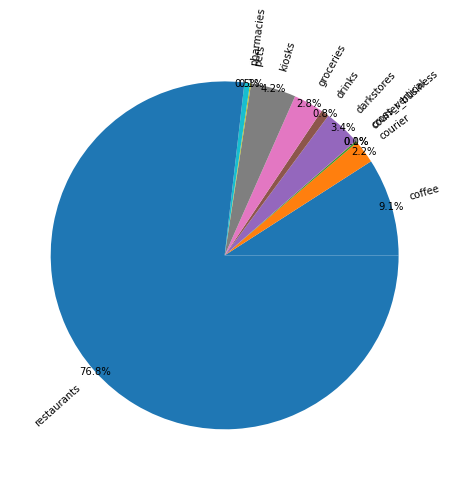

In [251]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[15,8])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0]*11, labels=labels, pctdistance=1,rotatelabels=True, labeldistance=1.1, )
#plt.title("Pedidos por categoria", fontsize=12);
pie.savefig("Pedidos por categoria.png")

## Solo me quedo con los pedidos que no fueron cancelados y que son a restaurantes

In [252]:
df = df_full[(df_full['orders_cancelled']==0) & (df_full['Vertical']=='restaurants')]


In [253]:
df

,order_id,Fecha,Hora,ciudad,orders_completed,orders_cancelled,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,avg_order_delay_minutes,to_pickup,to_dropoff,Vendor_id,Nombre_Vendor,Vertical
13,131748347,2021-11-05,13,Cordoba,1,0,69.100000,31.900000,37.200000,1.348,0.489,7354,McDonald's LIC,restaurants
23,131749603,2021-11-05,13,Cordoba,1,0,36.700000,30.883333,5.816667,0.359,0.513,1443,McDonald's Rafael Núñez 3900 (NVC),restaurants
34,131748367,2021-11-05,13,Cordoba,1,0,32.833333,32.666667,0.166667,0.735,0.684,1437,McDonald's Chacabuco (PEC),restaurants
40,131747891,2021-11-05,13,Cordoba,1,0,28.500000,54.833333,-26.333333,2.832,2.199,3974,Sandday Sandwich,restaurants
41,131747940,2021-11-05,13,Cordoba,1,0,22.400000,26.516667,-4.116667,0.151,1.931,56518,Grido Helados - 3009 - Hiperlibertad,restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206605,132587007,2021-11-07,2,Cordoba,1,0,35.283333,34.866667,0.416667,0.803,3.129,41980,QUE GUSTO!!!,restaurants
206607,132187747,2021-11-06,23,Cordoba,1,0,23.600000,24.583333,-0.983333,0.122,1.539,69304,Wonder Hamburgesería | General Paz,restaurants
206608,132130264,2021-11-06,20,Cordoba,1,0,10.416667,17.633333,-7.216667,0.368,1.367,7552,Glup's General Paz,restaurants
206609,132254044,2021-11-06,1,Cordoba,1,0,9.333333,26.783333,-17.450000,0.417,0.552,63191,Vittore Helados - Yofre,restaurants


In [254]:
df.drop(['orders_cancelled', 'orders_completed', 'Vertical', 'ciudad', 'avg_order_delay_minutes'], axis=1, inplace=True)

C:\Users\GCBA\anaconda3.1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [255]:
df.set_index('order_id', drop=True)

,Fecha,Hora,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,to_pickup,to_dropoff,Vendor_id,Nombre_Vendor
order_id,,,,,,,,
131748347,2021-11-05,13,69.100000,31.900000,1.348,0.489,7354,McDonald's LIC
131749603,2021-11-05,13,36.700000,30.883333,0.359,0.513,1443,McDonald's Rafael Núñez 3900 (NVC)
131748367,2021-11-05,13,32.833333,32.666667,0.735,0.684,1437,McDonald's Chacabuco (PEC)
131747891,2021-11-05,13,28.500000,54.833333,2.832,2.199,3974,Sandday Sandwich
131747940,2021-11-05,13,22.400000,26.516667,0.151,1.931,56518,Grido Helados - 3009 - Hiperlibertad
...,...,...,...,...,...,...,...,...
132587007,2021-11-07,2,35.283333,34.866667,0.803,3.129,41980,QUE GUSTO!!!
132187747,2021-11-06,23,23.600000,24.583333,0.122,1.539,69304,Wonder Hamburgesería | General Paz
132130264,2021-11-06,20,10.416667,17.633333,0.368,1.367,7552,Glup's General Paz


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152880 entries, 13 to 206610
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   order_id                            152880 non-null  int64  
 1   Fecha                               152880 non-null  object 
 2   Hora                                152880 non-null  int64  
 3   avg_actual_delivery_time_minutes    152880 non-null  float64
 4   avg_promised_delivery_time_minutes  152880 non-null  float64
 5   to_pickup                           152880 non-null  float64
 6   to_dropoff                          152880 non-null  float64
 7   Vendor_id                           152880 non-null  int64  
 8   Nombre_Vendor                       152880 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 11.7+ MB


In [257]:
dias_analizados = df['Fecha'].unique()
np.sort(dias_analizados)

array(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
       '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
       '2021-11-13', '2021-11-14'], dtype=object)

## Informacion complementaria sobre los pronosticos de lluvias

#### No sirve el dato historico de precipitaciones pues al momento de testear ese dato se supone no se conoce

In [258]:
# LLuvias sacadas del twitter de:
#                                Adm. Provincial de Recursos Hídricos de Cba
#                                @@APRHI_CBA

#                                Observatorio Hidro-meteorológico de Córdoba
#                                https://twitter.com/HidroCordoba

#                                Lanacion.com.ar
#                                lavoz.com.ar


# Lunes 1/11/21
# lluvia pronosticada 
# 1
# https://twitter.com/HidroCordoba/status/1455221043958886402/photo/1
# https://www.lavoz.com.ar/ciudadanos/se-viene-la-lluvia-mira-el-pronostico-para-esta-semana-en-cordoba/


# Martes 2/11/21
# sin datos
# sin lluvias -- 0.1 a 0.4 -> 0
# https://www.lanacion.com.ar/lifestyle/clima-en-cordoba-observatorio-cual-es-el-pronostico-del-tiempo-para-el-2-de-noviembre-nid01112021/


# Miercoles 3/11/21
# sin lluvia
# 0
# https://twitter.com/HidroCordoba/status/1455872798207918081/photo/1
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-3-de-noviembre-nid02112021/


# Jueves 4/11/21
# sin datos
# sin lluvias -- 0.4 a 0.7 -> 0.55 -> 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-4-de-noviembre-nid03112021/


# Viernes 5/11/21
# lluvia pronosticada
# 1
# https://twitter.com/HidroCordoba/status/1456634230532886551/photo/1
# https://www.lanacion.com.ar/lifestyle/clima-en-cordoba-observatorio-cual-es-el-pronostico-del-tiempo-para-el-5-de-noviembre-nid04112021/


# Sabado 6/11/21
# sin datos
# sin lluvias -- 0.1 a 0.40 -> 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-6-de-noviembre-nid05112021/


# Domingo 7/11/21
# sin datos
# sin lluvias -> 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-7-de-noviembre-nid06112021/


#Lunes 8/11/21
# sin datos
# sin lluvias -> 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-8-de-noviembre-nid07112021/

# Martes 9/11/21
# lluvia pronosticada 
# https://twitter.com/HidroCordoba/status/1458039361996574723/photo/1
# 0,4 a 0,7 -> 0.55 -> 1
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-9-de-noviembre-nid08112021/


# Miercoles 10/11/21
# lluvia pronosticada 
# https://twitter.com/HidroCordoba/status/1458394946847879170/photo/1
# 1
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-10-de-noviembre-nid09112021/


# Jueves 11/11/21
# sin datos
# sin datos
# 0


# Viernes 12/11/21
# sin lluvia
# 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-12-de-noviembre-nid11112021/


# Sabado 13/11/21
# sin datos
# 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-13-de-noviembre-nid12112021/


# Domingo 14/11/21
# sin datos
# 0
# https://www.lanacion.com.ar/lifestyle/clima-en-ciudad-de-cordoba-cual-es-el-pronostico-del-tiempo-para-el-14-de-noviembre-nid13112021/


# Esto hay que hacerlo antes de mapear los dias

In [259]:
df['llueve'] =          np.where(df['Fecha'] ==  '2021-11-01', 1, 
                        np.where(df['Fecha'] ==  '2021-11-02', 0,
                        np.where(df['Fecha'] ==  '2021-11-03', 0,
                        np.where(df['Fecha'] ==  '2021-11-04', 0,
                        np.where(df['Fecha'] ==  '2021-11-05', 1,
                        np.where(df['Fecha'] ==  '2021-11-06', 0,
                        np.where(df['Fecha'] ==  '2021-11-07', 0,
                        np.where(df['Fecha'] ==  '2021-11-08', 0,
                        np.where(df['Fecha'] ==  '2021-11-09', 1,
                        np.where(df['Fecha'] ==  '2021-11-10', 1,
                        np.where(df['Fecha'] ==  '2021-11-11', 0,
                        np.where(df['Fecha'] ==  '2021-11-12', 0,
                        np.where(df['Fecha'] ==  '2021-11-13', 0,                
                        np.where(df['Fecha'] ==  '2021-11-14', 0,            
                -1))))))))))))))

C:\Users\GCBA\AppData\Local\Temp/ipykernel_6948/1780170106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['llueve'] =          np.where(df['Fecha'] ==  '2021-11-01', 1,


In [260]:
df.llueve.value_counts()

0    118351
1     34529
Name: llueve, dtype: int64

In [261]:
df['Fecha'] = df['Fecha'].map({'2021-11-01':'Lunes','2021-11-02':'Martes', '2021-11-03':'Miercoles','2021-11-04':'Jueves',
                               '2021-11-05':'Viernes', '2021-11-06':'Sabado', '2021-11-07':'Domingo',
                               '2021-11-08':'Lunes', '2021-11-09':'Martes', '2021-11-10':'Miercoles', '2021-11-11':'Jueves', 
                               '2021-11-12':'Viernes', '2021-11-13':'Sabado', '2021-11-14':'Domingo'})
df.head()

C:\Users\GCBA\AppData\Local\Temp/ipykernel_6948/351703985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = df['Fecha'].map({'2021-11-01':'Lunes','2021-11-02':'Martes', '2021-11-03':'Miercoles','2021-11-04':'Jueves',


,order_id,Fecha,Hora,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,to_pickup,to_dropoff,Vendor_id,Nombre_Vendor,llueve
13,131748347,Viernes,13,69.100000,31.900000,1.348,0.489,7354,McDonald's LIC,1
23,131749603,Viernes,13,36.700000,30.883333,0.359,0.513,1443,McDonald's Rafael Núñez 3900 (NVC),1
34,131748367,Viernes,13,32.833333,32.666667,0.735,0.684,1437,McDonald's Chacabuco (PEC),1
40,131747891,Viernes,13,28.500000,54.833333,2.832,2.199,3974,Sandday Sandwich,1
41,131747940,Viernes,13,22.400000,26.516667,0.151,1.931,56518,Grido Helados - 3009 - Hiperlibertad,1


In [262]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,152880.0,1.326536e+08,964582.636811,1.309357e+08,1.318776e+08,1.326185e+08,1.334907e+08,1.342785e+08
Hora,152880.0,9.862108e+00,9.054451,0.000000e+00,1.000000e+00,1.400000e+01,1.700000e+01,2.300000e+01
avg_actual_delivery_time_minutes,152880.0,3.112975e+01,15.077845,1.866667e+00,2.078333e+01,2.840000e+01,3.813333e+01,3.408167e+02
avg_promised_delivery_time_minutes,152880.0,3.085217e+01,9.241744,3.333333e-02,2.435000e+01,2.983333e+01,3.665000e+01,8.068333e+01
to_pickup,152880.0,5.710425e-01,0.731328,0.000000e+00,3.400000e-02,3.350000e-01,8.180000e-01,3.095200e+01
to_dropoff,152880.0,1.319565e+00,0.984398,0.000000e+00,6.060000e-01,1.097000e+00,1.809000e+00,9.848500e+01
Vendor_id,152880.0,3.340030e+04,21630.294145,7.500000e+01,1.161000e+04,3.510300e+04,5.357900e+04,7.293600e+04
llueve,152880.0,2.258569e-01,0.418147,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


<AxesSubplot:>

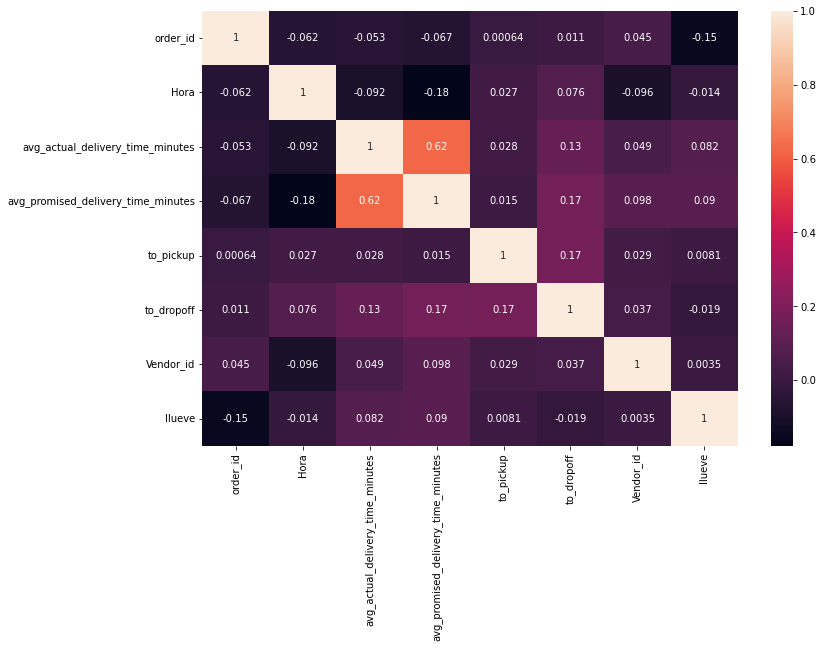

In [263]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [264]:
df.corr()['avg_actual_delivery_time_minutes'].sort_values(ascending=False)[1:]

avg_promised_delivery_time_minutes    0.623438
to_dropoff                            0.132813
llueve                                0.081681
Vendor_id                             0.048515
to_pickup                             0.027782
order_id                             -0.052501
Hora                                 -0.091735
Name: avg_actual_delivery_time_minutes, dtype: float64

In [265]:
df.head()

,order_id,Fecha,Hora,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,to_pickup,to_dropoff,Vendor_id,Nombre_Vendor,llueve
13,131748347,Viernes,13,69.100000,31.900000,1.348,0.489,7354,McDonald's LIC,1
23,131749603,Viernes,13,36.700000,30.883333,0.359,0.513,1443,McDonald's Rafael Núñez 3900 (NVC),1
34,131748367,Viernes,13,32.833333,32.666667,0.735,0.684,1437,McDonald's Chacabuco (PEC),1
40,131747891,Viernes,13,28.500000,54.833333,2.832,2.199,3974,Sandday Sandwich,1
41,131747940,Viernes,13,22.400000,26.516667,0.151,1.931,56518,Grido Helados - 3009 - Hiperlibertad,1


In [266]:
# Revisemos que pasa con mcdonalds

In [267]:
df[df['Nombre_Vendor'].str.contains('Mcd')].Vendor_id.unique()

array([58098, 58076, 58066, 58116, 58023], dtype=int64)

In [268]:
#parecen haber solo 5 mcdonalds en cordoba. Raro..

In [269]:
df[df['Nombre_Vendor'].str.contains('Mc')]['Nombre_Vendor'].value_counts()

McDonald's L2C                              1282
McDonald's Spc                              1229
McDonald's RVC                              1092
McDonald's Vcp                              1086
McDonald's Colón Alberdi (CAC)              1077
McDonald's W1c                              1048
McDonald's NCS                               887
McDonald's Rafael Núñez 4700 (ANC)           815
McDonald's Chacabuco (PEC)                   748
McDonald's CSC                               733
McDonald's Elias Yofre 1000 (PJC)            682
McDonald's W2C                               534
McDonald's Rafael Núñez 3900 (NVC)           460
McDonald's 25 de Mayo (P9C)                  411
McDonald's LSC                               408
McDonald's LIC                               367
McDonald's GPC                               363
McDonald's VAC                               330
McDonald's C2C                               127
McDonald's DIC                                88
Helados Mcdonald's -

In [270]:
#Algunos mcdonalds estan mal nombrados
df[df['Nombre_Vendor'].str.contains('Mc')]['Nombre_Vendor'].value_counts().sum()
#por lo que los pedidos de mcdonalds son el 10% del total...

14083

In [271]:
df[df['Nombre_Vendor'].str.contains('Mcd')]['Nombre_Vendor'].value_counts().sum()

143

In [272]:
#Corrijo el Vendor_id
df.loc[df['Nombre_Vendor'].str.contains('Mc'), 'Vendor_id'] = 1

C:\Users\GCBA\anaconda3.1\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [273]:
#Verifico el Vendor_id
df[df['Nombre_Vendor'].str.contains('Mc')]['Vendor_id'].unique()

array([1], dtype=int64)

In [274]:
#Veamos que pasa con Burger King

In [275]:
df[df['Nombre_Vendor'].str.contains('King')]['Nombre_Vendor'].value_counts().sum()

3354

In [276]:
df.loc[df['Nombre_Vendor'].str.contains('King'), 'Vendor_id'] = 2

In [277]:
df['Nombre_Vendor'].value_counts().head(60)

El Club de la Milanesa Nueva Córdoba           1591
Sushi 2x1 - Nueva Córdoba                      1330
McDonald's L2C                                 1282
McDonald's Spc                                 1229
Karma Food                                     1193
McDonald's RVC                                 1092
McDonald's Vcp                                 1086
One Nueva Córdoba                              1081
McDonald's Colón Alberdi (CAC)                 1077
McDonald's W1c                                 1048
Mostaza Patio Olmos                            1032
8MM Pizza x metro                               979
The One Lomos & Burger                          934
Burger King Buen Pastor                         927
McDonald's NCS                                  887
Humberto Pizzas y Lomos                         844
Sushi 2x1 - Cerro de las Rosas                  821
McDonald's Rafael Núñez 4700 (ANC)              815
Caseratto Delivery                              798
Mostaza Córd

In [278]:
#Veamos que pasa con Club de la milanesa
df[df['Nombre_Vendor'].str.contains('Milanesa')]['Nombre_Vendor'].unique()

array(['El Club de la Milanesa Nueva Córdoba',
       'El Club de la Milanesa Barrio Jardín',
       'El Club de la Milanesa Valle Escondido',
       'El Club de la Milanesa General Paz',
       'El Club de la Milanesa Cerro de las Rosas',
       'El Club De La Milanesa Las Margaritas', 'Lunfardo Milanesas',
       'Mercado Milanesa - Villa Cabrera'], dtype=object)

In [279]:
#hay un Mercado milanesa que no es el club de la milanesa, asi que atencion con el Regex:
df.loc[df['Nombre_Vendor'].str.contains('El Club de la Milanesa'), 'Vendor_id'] = 3

In [280]:
df[df['Nombre_Vendor'].str.contains('El Club de la Milanesa')]['Vendor_id']

187       3
314       3
334       3
359       3
622       3
         ..
206063    3
206397    3
206435    3
206540    3
206577    3
Name: Vendor_id, Length: 2619, dtype: int64

In [281]:
#Veamos que pasa con Sushi 2x1
df[df['Nombre_Vendor'].str.contains('Sushi 2x1')]['Nombre_Vendor'].unique()

array(['Sushi 2x1 - Nueva Córdoba', 'Sushi 2x1 - Cerro de las Rosas',
       'Sushi 2x1 - General Paz', 'Sushi 2x1 - Sabattini',
       'Sushi 2x1 - Yofre', 'Sushi 2x1 - Recta Martinolli',
       'Sushi 2x1 - Jardín', 'Sushi 2x1 - Colón',
       'Sushi 2x1 - Alta Córdoba', 'Sushi 2x1 - Alberdi',
       'Sushi 2x1 - Villa Allende'], dtype=object)

In [282]:
df.loc[df['Nombre_Vendor'].str.contains('Sushi 2x1'), 'Vendor_id'] = 4

In [283]:
#Veamos que pasa con karma food
df[df['Nombre_Vendor'].str.contains('Karma Food')]['Nombre_Vendor'].unique()


array(['Karma Food - Alta Córdoba', 'Karma Food - Salguero', 'Karma Food',
       'Karma Food - Ituzaingó'], dtype=object)

In [284]:
df.loc[df['Nombre_Vendor'].str.contains('Karma Food'), 'Vendor_id'] = 5

In [285]:
#Veamos que pasa con one
df[df['Nombre_Vendor'].str.contains('One')]['Nombre_Vendor'].unique()

array(['The One Lomos & Burger', 'One Nueva Córdoba', 'One General Paz',
       'Waffles One Love', 'The One Lomos & Burgers - Alta Córdoba'],
      dtype=object)

In [286]:
df.loc[df['Nombre_Vendor'].str.contains('One Nueva Córdoba'), 'Vendor_id'] = 6
df.loc[df['Nombre_Vendor'].str.contains('One General Paz'), 'Vendor_id'] = 6

In [287]:
#Veamos que pasa con Mostaza
df[df['Nombre_Vendor'].str.contains('Mostaza')]['Nombre_Vendor'].unique()


array(['Mostaza Cordoba General Paz', 'Mostaza Córdoba Libertad',
       'Mostaza Villa Carlos Paz', 'Mostaza Patio Olmos',
       'Mostaza Villa Cabrera', 'Mostaza - Paseo Jockey'], dtype=object)

In [288]:
df.loc[df['Nombre_Vendor'].str.contains('Mostaza'), 'Vendor_id'] = 7

In [289]:
#Veamos que pasa con 8MM Pizza x metro 
df[df['Nombre_Vendor'].str.contains('8MM')]['Nombre_Vendor'].unique()

array(['8MM Pizza x metro'], dtype=object)

In [290]:
df.loc[df['Nombre_Vendor'].str.contains('8MM'), 'Vendor_id'] = 8

In [291]:
#Veamos que pasa con The One Lomos
df[df['Nombre_Vendor'].str.contains('The One Lomos')]['Nombre_Vendor'].unique()

array(['The One Lomos & Burger', 'The One Lomos & Burgers - Alta Córdoba'],
      dtype=object)

In [292]:
df.loc[df['Nombre_Vendor'].str.contains('The One Lomos'), 'Vendor_id'] = 9

In [293]:
#Veamos que pasa con Humberto Pizzas y Lomos
df[df['Nombre_Vendor'].str.contains('Humberto')]['Nombre_Vendor'].unique()

array(['Humberto Pizzas y Lomos', 'Humberto Pizzas'], dtype=object)

In [294]:
df.loc[df['Nombre_Vendor'].str.contains('Humberto Pizza'), 'Vendor_id'] = 10

In [295]:
#Veamos que pasa con Caseratto Delivery
df[df['Nombre_Vendor'].str.contains('Caseratto')]['Nombre_Vendor'].unique()

array(['Caseratto Delivery - Cerro', 'Caseratto Delivery'], dtype=object)

In [296]:
df.loc[df['Nombre_Vendor'].str.contains('Caseratto'), 'Vendor_id'] = 11

##### Ahora hago un analisis de los los restaurantes cuyos id yo cambie manualmente para
##### ver que % del total de pedidos representan

In [297]:
(100*df[df['Vendor_id']<12]['Vendor_id'].value_counts().sum()/len(df)).round(1)


25.6

In [298]:
factor_horario = pd.DataFrame(df[df['Vendor_id']<12].groupby(['Fecha','Vendor_id','Hora']).count()['order_id'])
factor_horario

order_id
Fecha   Vendor_id Hora          
Domingo 1         0          362
                  1          264
                  2           70
                  3           26
                  10           3
...                          ...
Viernes 11        19          12
                  20           2
                  21           5
                  22           1
                  23           7

[954 rows x 1 columns]

In [299]:
#factor_horario.to_csv('testeo.csv', encoding='utf-8', index=True)

In [300]:
df['ph'] = df.groupby(['Fecha','Vendor_id','Hora'])['order_id'].transform(len)

C:\Users\GCBA\AppData\Local\Temp/ipykernel_6948/4181432701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'] = df.groupby(['Fecha','Vendor_id','Hora'])['order_id'].transform(len)


In [301]:
df['ph'] = df['ph'].transform(lambda x: 0 if (x < 100) 
                              else (1 if (x < 200 ) 
                                   else (2 if (x < 300 ) 
                                         else (3 if (x < 400 ) 
                                               else 4))))

C:\Users\GCBA\AppData\Local\Temp/ipykernel_6948/2013818299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'] = df['ph'].transform(lambda x: 0 if (x < 100)


In [302]:
df.columns

Index(['order_id', 'Fecha', 'Hora', 'avg_actual_delivery_time_minutes',
       'avg_promised_delivery_time_minutes', 'to_pickup', 'to_dropoff',
       'Vendor_id', 'Nombre_Vendor', 'llueve', 'ph'],
      dtype='object')

## Guardado del DataFrame a un CSV

In [303]:
#df[df['Vendor_id']<12].drop(['Nombre_Vendor'],axis=1).to_csv('df_guardado.csv', encoding='utf-8', index=False)
df = df[df['Vendor_id']<12].drop(['Nombre_Vendor'],axis=1)

# Analisis Univariado

In [304]:
df.head()

,order_id,Fecha,Hora,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,to_pickup,to_dropoff,Vendor_id,llueve,ph
13,131748347,Viernes,13,69.100000,31.900000,1.348,0.489,1,1,0
23,131749603,Viernes,13,36.700000,30.883333,0.359,0.513,1,1,0
34,131748367,Viernes,13,32.833333,32.666667,0.735,0.684,1,1,0
63,131743177,Viernes,12,39.383333,40.600000,0.166,2.121,1,1,0
72,131738512,Viernes,11,29.450000,35.883333,2.924,2.898,1,1,0


In [305]:
df.columns

Index(['order_id', 'Fecha', 'Hora', 'avg_actual_delivery_time_minutes',
       'avg_promised_delivery_time_minutes', 'to_pickup', 'to_dropoff',
       'Vendor_id', 'llueve', 'ph'],
      dtype='object')

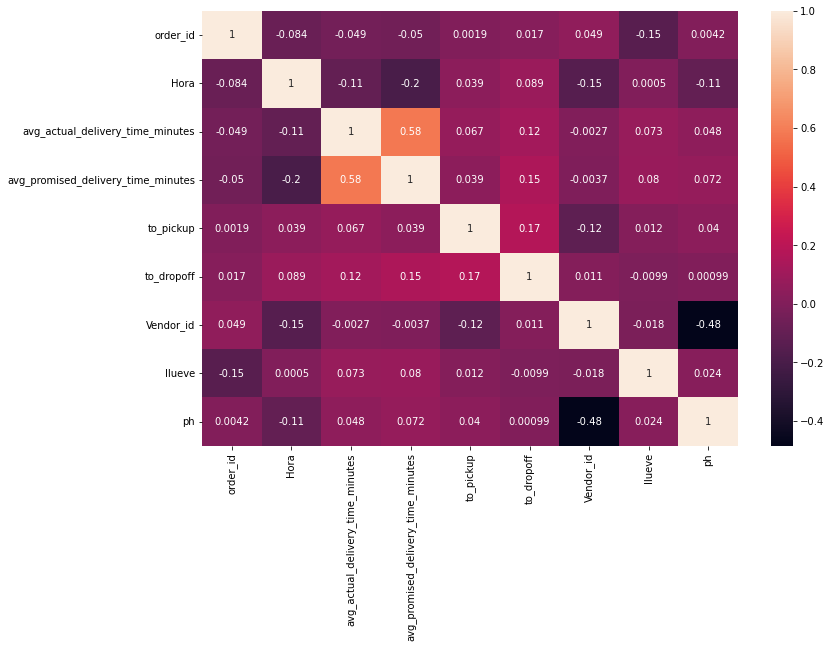

In [306]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

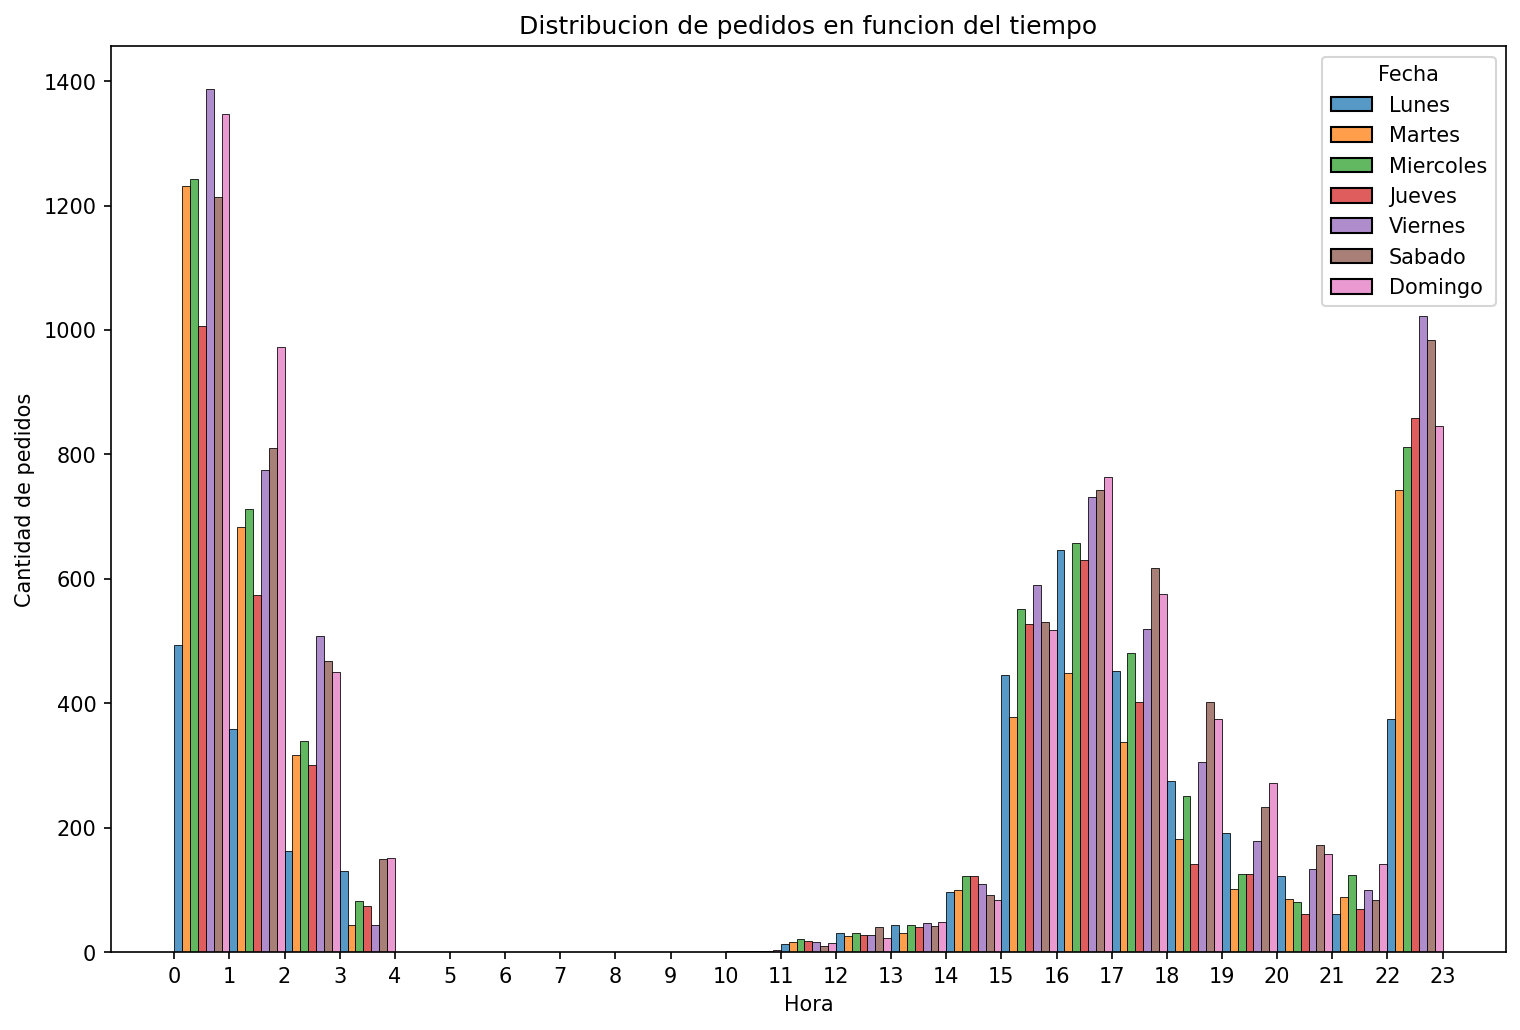

In [307]:
plt.figure(figsize=(12,8), dpi=150)
ax1 = sns.histplot(x=df.Hora, hue=df.Fecha, multiple='dodge', hue_order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.title('Distribucion de pedidos en funcion del tiempo')
plt.ylabel('Cantidad de pedidos')
plt.xlabel('Hora')
ax1.set_xticks(np.arange(24));

In [308]:
df2 = df.groupby(by=['Hora']).mean()
df2['Hora'] = df2.index
df2

,order_id,avg_actual_delivery_time_minutes,avg_promised_delivery_time_minutes,to_pickup,to_dropoff,Vendor_id,llueve,ph,Hora
Hora,,,,,,,,,
0,1.326644e+08,33.648273,32.228537,0.475776,1.156160,4.105529,0.230371,1.481065,0
1,1.327601e+08,32.611600,32.734281,0.472736,1.058203,4.425532,0.192308,0.494885,1
2,1.327326e+08,26.948926,26.566372,0.448667,1.199457,5.305818,0.225236,0.000000,2
3,1.325221e+08,27.256182,27.596044,0.498846,1.208169,6.065282,0.218101,0.000000,3
10,1.324380e+08,27.442424,23.377273,1.146545,1.140455,1.000000,0.363636,0.000000,10
11,1.323183e+08,28.216061,25.291061,1.157918,1.250573,1.545455,0.318182,0.000000,11
12,1.324014e+08,27.271036,26.629288,0.983117,1.221515,1.388350,0.252427,0.000000,12
13,1.323298e+08,30.079068,27.668238,0.839219,1.274330,1.878788,0.276094,0.000000,13
14,1.323352e+08,25.299011,24.385011,0.716514,1.482299,3.143448,0.256552,0.000000,14


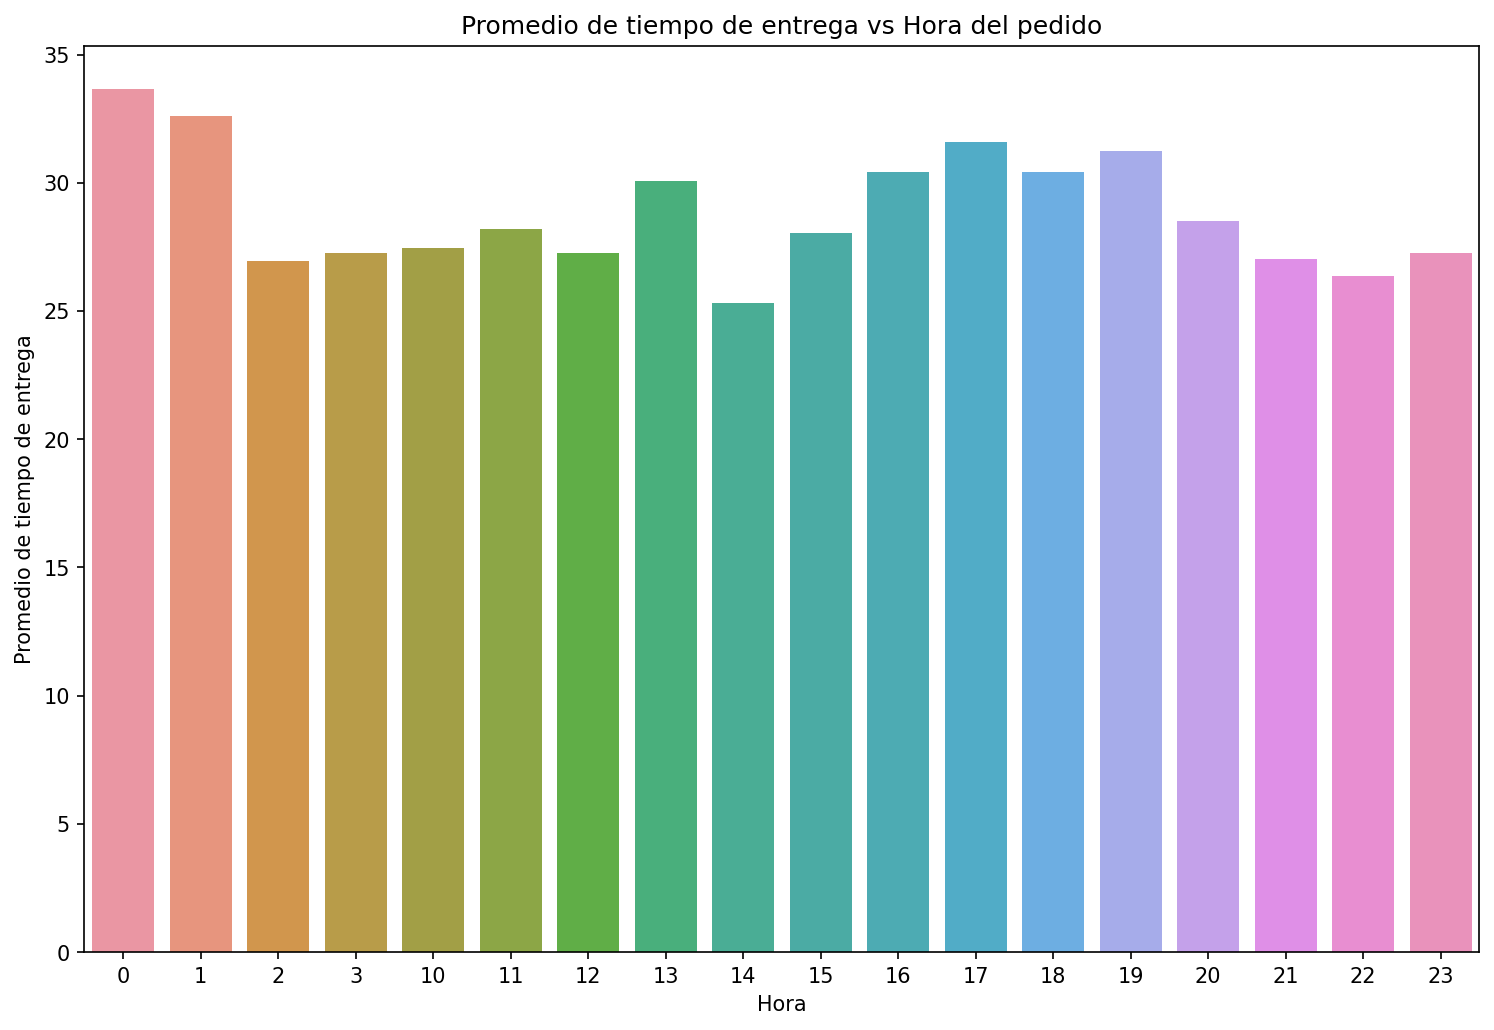

In [309]:
plt.figure(figsize=(12,8), dpi=150)
ax1 = sns.barplot(y='avg_actual_delivery_time_minutes', x='Hora', data = df2)
plt.title('Promedio de tiempo de entrega vs Hora del pedido')
plt.ylabel('Promedio de tiempo de entrega')
plt.xlabel('Hora');

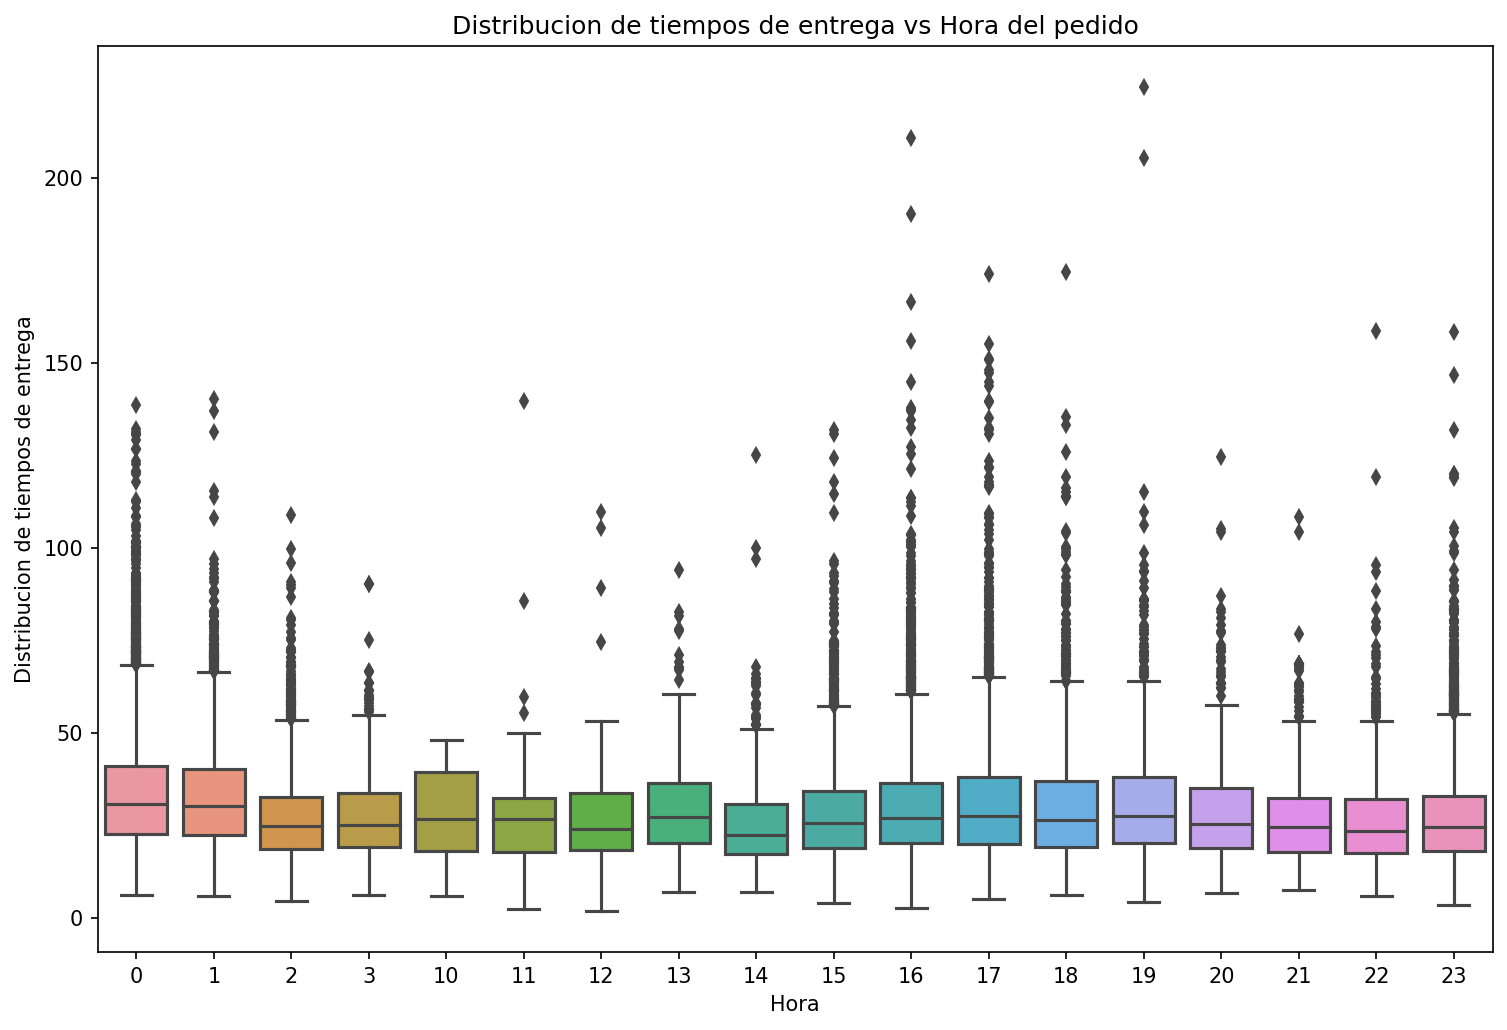

In [310]:
plt.figure(figsize=(12,8), dpi=150)
sns.boxplot(x='Hora', y='avg_actual_delivery_time_minutes', data=df )#,hue='Fecha' )
plt.title('Distribucion de tiempos de entrega vs Hora del pedido')
plt.ylabel('Distribucion de tiempos de entrega')
plt.xlabel('Hora');

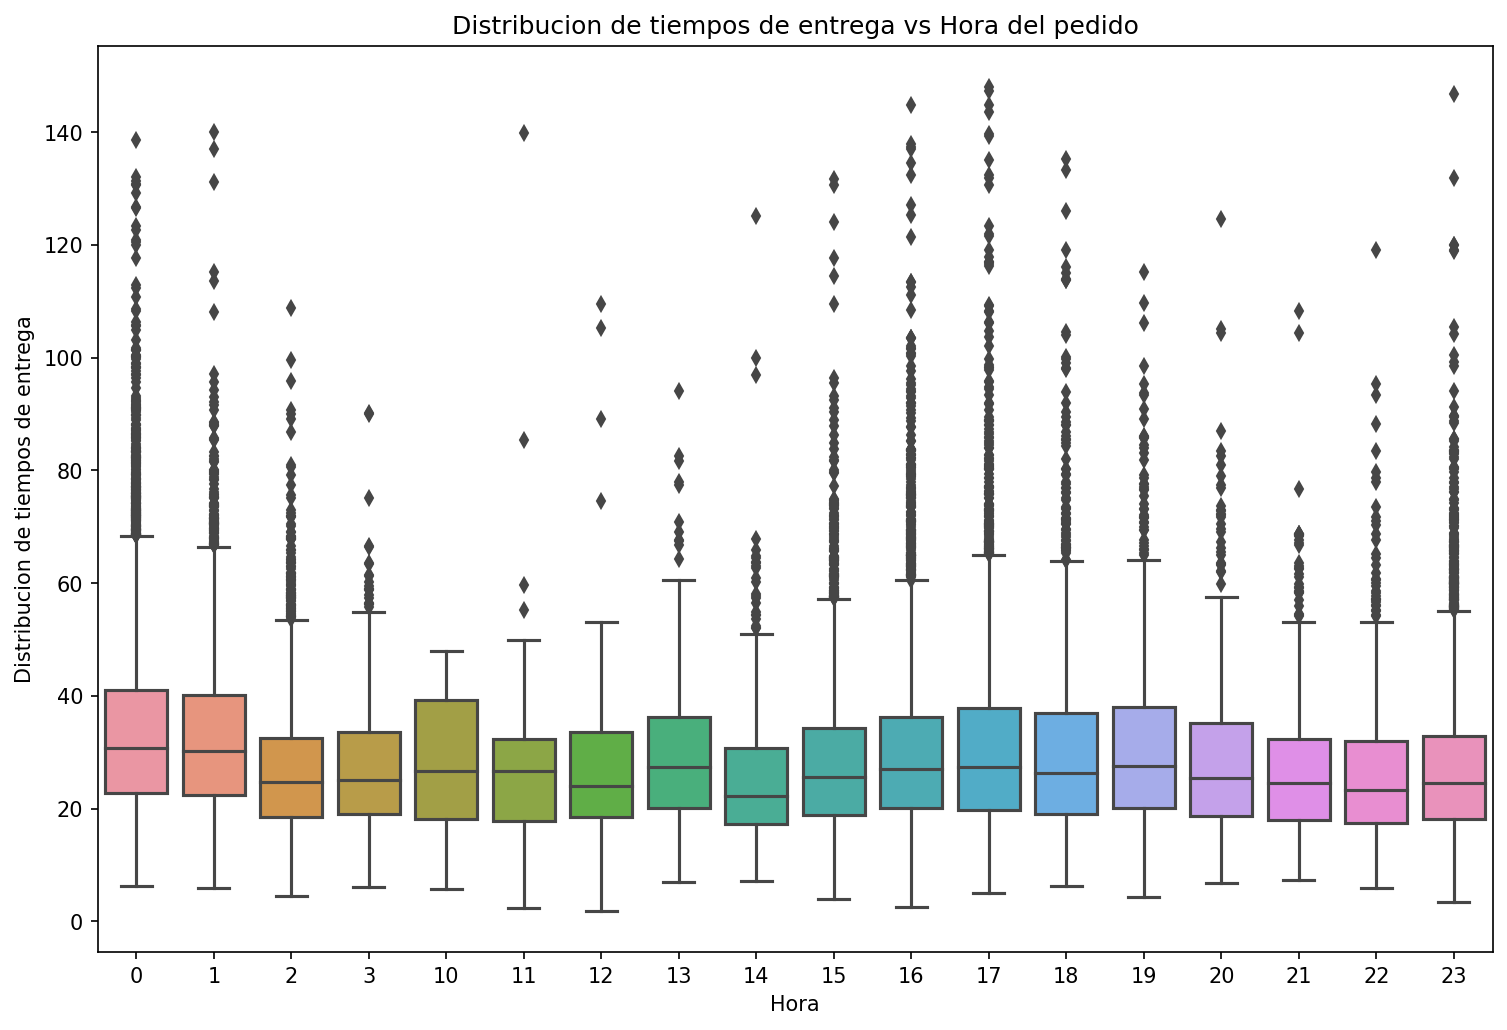

In [311]:
df = df[df['avg_actual_delivery_time_minutes']<150]
plt.figure(figsize=(12,8), dpi=150)
sns.boxplot(x='Hora', y='avg_actual_delivery_time_minutes', data=df )#,hue='Fecha' )
plt.title('Distribucion de tiempos de entrega vs Hora del pedido')
plt.ylabel('Distribucion de tiempos de entrega')
plt.xlabel('Hora');
#SON OUTLIERS Y DEBEN SER DROPEADOS A LOS EFECTOS DEL MODELO DE PREDICCION
#PUEDEN TENER MUCHO VALOR PARA INVESTIGAR QUE PASO Y PREVENIR EN EL FUTURO

In [312]:
#sns.pairplot(df)

<AxesSubplot:xlabel='to_pickup', ylabel='avg_actual_delivery_time_minutes'>

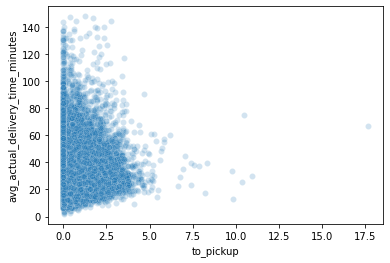

In [313]:
sns.scatterplot(x='to_pickup',y='avg_actual_delivery_time_minutes', data=df, alpha=0.2)
#Se ven mas Outliers

<AxesSubplot:xlabel='to_pickup', ylabel='avg_actual_delivery_time_minutes'>

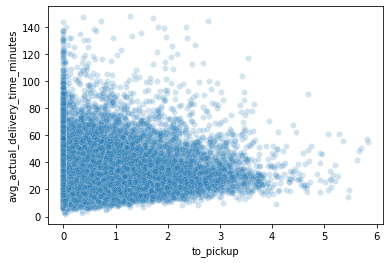

In [314]:
df = df[df['to_pickup']<6]
sns.scatterplot(x='to_pickup',y='avg_actual_delivery_time_minutes', data=df, alpha=0.2)

<AxesSubplot:xlabel='to_dropoff', ylabel='avg_actual_delivery_time_minutes'>

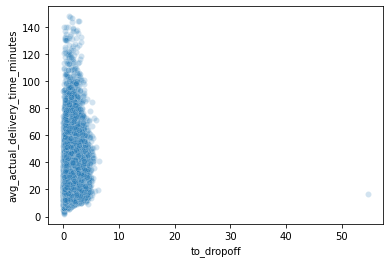

In [315]:
sns.scatterplot(x='to_dropoff',y='avg_actual_delivery_time_minutes', data=df, alpha=0.2)
#Se ven mas Outliers

<AxesSubplot:xlabel='to_dropoff', ylabel='avg_actual_delivery_time_minutes'>

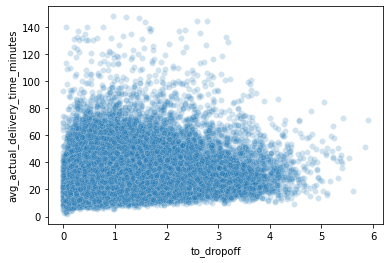

In [316]:
df = df[df['to_dropoff']<6]
sns.scatterplot(x='to_dropoff',y='avg_actual_delivery_time_minutes', data=df, alpha=0.2)

In [317]:
df.columns

Index(['order_id', 'Fecha', 'Hora', 'avg_actual_delivery_time_minutes',
       'avg_promised_delivery_time_minutes', 'to_pickup', 'to_dropoff',
       'Vendor_id', 'llueve', 'ph'],
      dtype='object')

<AxesSubplot:xlabel='to_dropoff', ylabel='to_pickup'>

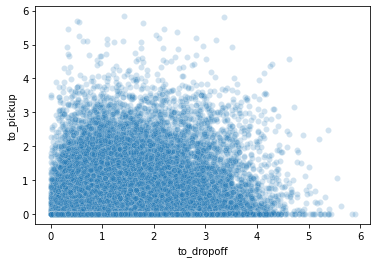

In [318]:
sns.scatterplot(x='to_dropoff',y='to_pickup', data=df, alpha=0.2)

<AxesSubplot:xlabel='avg_promised_delivery_time_minutes', ylabel='avg_actual_delivery_time_minutes'>

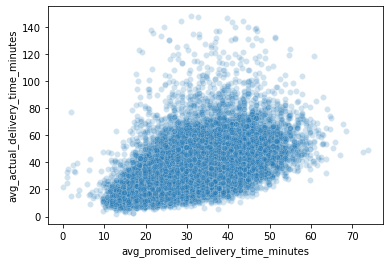

In [319]:
sns.scatterplot(x='avg_promised_delivery_time_minutes',y='avg_actual_delivery_time_minutes', data=df, alpha=0.2)

## Guardado del DataFrame a un CSV

In [321]:
df[df['Vendor_id']<12].to_csv('df_guardado_clean.csv', encoding='utf-8', index=False)